In [36]:
# Import NumPy for numerical computations
import numpy as np
# Import make_regression from scikit-learn to generate synthetic regression data
from sklearn.datasets import make_regression
# Import pyplot from matplotlib for data visualization
import matplotlib.pyplot as plt

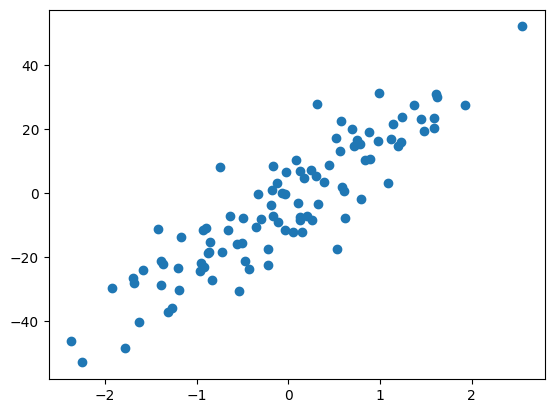

In [37]:
x,y = make_regression(n_samples=100,n_features=1,noise=10)
plt.scatter(x,y)

In [38]:
y = y.reshape(-1,1)
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


In [39]:
X = np.hstack((x,np.ones(x.shape)))

In [40]:
theta = np.random.randn(2,1)
print(theta)

[[1.14316535]
 [1.07097866]]


In [41]:
print("Model")

Model


In [42]:
def model(X,theta):
    ret = X @ theta
    return ret

In [43]:
print(X.shape)
print(theta.shape)

(100, 2)
(2, 1)


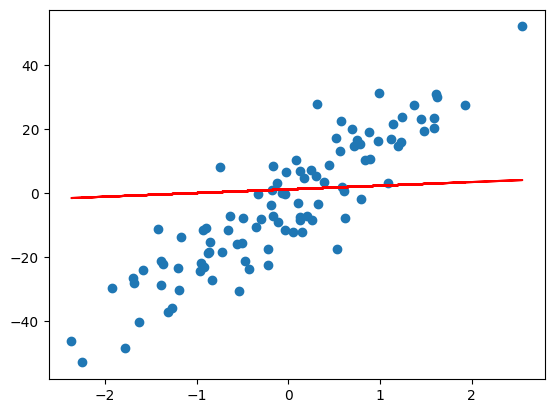

In [45]:
plt.plot(x,model(X,theta),c="red")
plt.scatter(x,y)

In [44]:
print("Fonction cout")

Fonction cout


In [46]:
def cost_function(x,y,theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X,theta) -y) ** 2)

In [47]:
cost_function(X,y,theta)

np.float64(194.42601659649074)

In [48]:
print("Descend de Gradient")

Descend de Gradient


In [15]:
def grad(X,y,theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta) - y)

In [49]:
def gradient_descent(X,y,theta,learning_rate,n):
    cost_historie = np.zeros(n)
    for i in range(0,n):
        theta = theta - learning_rate * grad(X,y,theta)
        cost_historie[i] = cost_function(X,y,theta)
    return theta, cost_historie

In [50]:
theta_final, cost_historie = gradient_descent(X,y,theta,0.01,n=400)

In [51]:
print(theta_final)

[[17.88522604]
 [-2.7364838 ]]


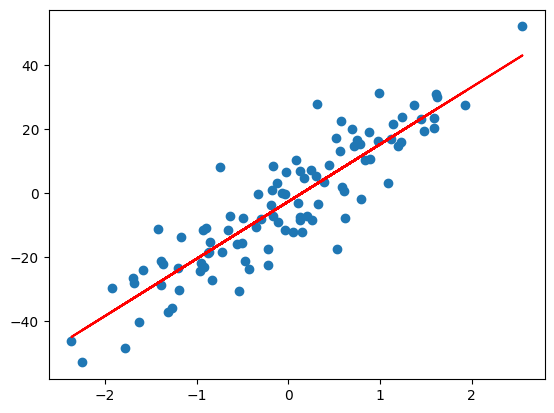

In [52]:
predictions = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,predictions,c="red")

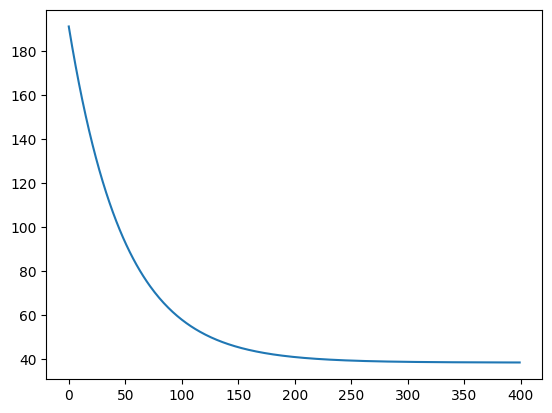

In [53]:
plt.plot(range(400),cost_historie)

## Coefficient de Determination

$$\R² =1 - \frac{\sum(y-f(x))²}{\sum(y-\bar{y})²}$$

In [54]:
def coef_determination(y,pred):
    u = np.sum((y - pred) ** 2)
    v = np.sum((y - y.mean()) ** 2)
    return 1 - (u/v)

In [56]:
print(coef_determination(y,predictions))

0.8117803859084581
